# CNN Image classification with Keras

## Load needed packages

In [ ]:
%matplotlib inline

import os

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

## Get The data

In [ ]:
# Extract the data from the zip file
!unzip "Our_dataset.zip"

Archive:  Our_dataset.zip
   creating: Our_dataset/
   creating: Our_dataset/Correct/
  inflating: Our_dataset/.DS_Store   
   creating: Our_dataset/Incorrect/
  inflating: Our_dataset/Correct/0298.png  
  inflating: Our_dataset/Correct/0267.png  
  inflating: Our_dataset/Correct/0501.png  
  inflating: Our_dataset/Correct/0515.png  
  inflating: Our_dataset/Correct/0273.png  
  inflating: Our_dataset/Correct/0529.png  
  inflating: Our_dataset/Correct/0703.png  
  inflating: Our_dataset/Correct/0688.png  
  inflating: Our_dataset/Correct/016.png  
  inflating: Our_dataset/Correct/0677.png  
  inflating: Our_dataset/Correct/0111.png  
  inflating: Our_dataset/Correct/0105.png  
  inflating: Our_dataset/Correct/0663.png  
  inflating: Our_dataset/Correct/0139.png  
  inflating: Our_dataset/Correct/0313.png  
  inflating: Our_dataset/Correct/0475.png  
  inflating: Our_dataset/Correct/0461.png  
  inflating: Our_dataset/Correct/0307.png  
  inflating: Our_dataset/Correct/0449.png  
  inf

### Load the dataset

In [ ]:
root = 'Our_dataset'
train_split, val_split = 0.7, 0.15

categories = [  x[0] for x in os.walk(root) if x[0]  ]   [1:]

print(categories)

['Our_dataset/Correct', 'Our_dataset/Incorrect']


This function is useful for pre-processing the data into an image and input vector.

In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

Load all the images from root folder

In [ ]:
for c, category in enumerate(categories):
  print(c, "---", category)

0 --- Our_dataset/Correct
1 --- Our_dataset/Incorrect


In [ ]:
data = []

for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]

              
    for img_path in images:
        img = get_image(img_path)
        data.append({'x':np.array(img[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

In [ ]:
num_classes

2

## Prepare the Data

create training / validation / test split (70%, 15%, 15%)

In [ ]:
train_split + val_split

0.85

In [ ]:
import random

random.shuffle(data)

In [ ]:
idX_val = int(train_split * len(data))

idX_test = int((train_split + val_split) * len(data))

train = data[:idX_val]

val = data[idX_val:idX_test]


test = data[idX_test:]

Separate data for labels.

In [ ]:
X_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
X_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
X_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0]


Pre-process the data as before by making sure it's float32 and normalized between 0 and 1.

In [ ]:
# normalize data
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [ ]:
# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(211, 2)


Let's get a summary of what we have.

In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(X_train), len(X_val), len(X_test)))
print("training data shape: ", X_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 1406 images from 2 categories
train / validation / test split: 984, 211, 211
training data shape:  (984, 200, 200, 3)
training labels shape:  (984, 2)


## Visualize your data

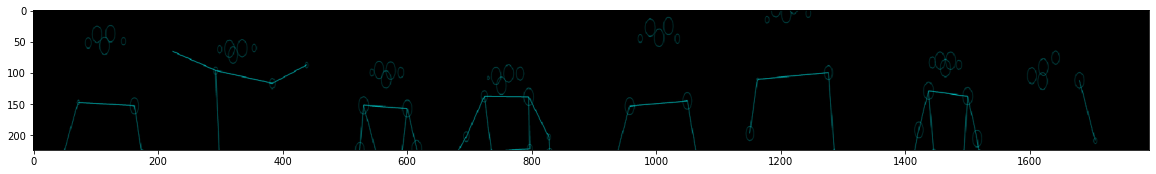

In [ ]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]

idx = [int(len(images) * random.random()) for i in range(8)]


imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]

concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)

plt.figure(figsize=(20,4))
plt.imshow(concat_image)

## Train a convolutional Neural Net from scratch



In [ ]:
# TODO: Build your own neural Network
model = Sequential()


model.add( Conv2D(32, (3,3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
# Fully connected layers

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

#output layer
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9

In [ ]:
# TODO: compile the model to use categorical_cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  


history = model.fit(X_train, y_train,
                    batch_size=20,
                    epochs=100,
                    validation_data=(X_val, y_val), callbacks=[checkpoint])


Epoch 1/100
50/50 [==============================] - 34s 31ms/step - loss: 0.5061 - accuracy: 0.6828 - val_loss: 0.5045 - val_accuracy: 0.6351

Epoch 00001: val_loss improved from inf to 0.50452, saving model to model-001-0.805894-0.635071.h5
Epoch 2/100
50/50 [==============================] - 1s 20ms/step - loss: 0.2568 - accuracy: 0.8938 - val_loss: 0.2969 - val_accuracy: 0.8341

Epoch 00002: val_loss improved from 0.50452 to 0.29685, saving model to model-002-0.929878-0.834123.h5
Epoch 3/100
50/50 [==============================] - 1s 21ms/step - loss: 0.1444 - accuracy: 0.9369 - val_loss: 0.1031 - val_accuracy: 0.9810

Epoch 00003: val_loss improved from 0.29685 to 0.10308, saving model to model-003-0.957317-0.981043.h5
Epoch 4/100
50/50 [==============================] - 1s 21ms/step - loss: 0.0688 - accuracy: 0.9746 - val_loss: 0.1013 - val_accuracy: 0.9810

Epoch 00004: val_loss improved from 0.10308 to 0.10131, saving model to model-004-0.979675-0.981043.h5
Epoch 5/100
50/50 [

Let's plot the validation loss and validation accuracy over time.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_confusion_matrix, confusion_matrix, plot_roc_curve

y_predic = model.predict(X_test)


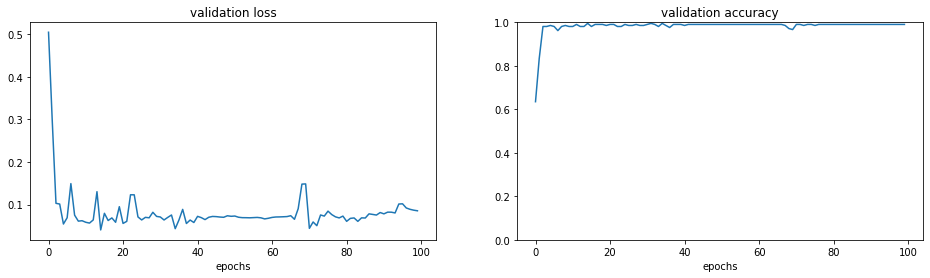

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.1485707014799118
Test accuracy: 0.9763033390045166


In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

Train loss: 1.2177204098406946e-06
Train accuracy: 1.0


In [ ]:
n = 12
"match" if np.argmax(model.predict(X_train[n].reshape(1,200, 200, 3))) == np.argmax(y_train[n]) else "not match"

'match'

In [ ]:
n = 24
"match" if np.argmax(model.predict(X_test[n].reshape(1,200, 200, 3))) == np.argmax(y_test[n]) else "not match"

'match'

In [ ]:
model_name = 'Our_dataset.h5'
model.save(model_name)


In [ ]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [ ]:
print(predict_train)
print(predict_train.shape)

[[9.9965620e-01 3.7156312e-06]
 [3.5363375e-04 1.0000000e+00]
 [9.9979287e-01 9.4249543e-07]
 ...
 [9.9956316e-01 1.1698323e-05]
 [9.9652725e-01 1.5364838e-04]
 [9.9890494e-01 3.4604476e-05]]
(984, 2)


In [ ]:
print(y_train)
print(y_train.shape)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(984, 2)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predict_train = model.predict(X_train)

predict_train = predict_train.astype(int)

print(confusion_matrix(y_train[:, [0]], predict_train[:, [0]]))

print(classification_report(y_train[:, [0]], predict_train[:, [0]]))

[[494   0]
 [490   0]]
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       494
         1.0       0.00      0.00      0.00       490

    accuracy                           0.50       984
   macro avg       0.25      0.50      0.33       984
weighted avg       0.25      0.50      0.34       984



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Plotting**

In [ ]:
from sklearn.metrics import roc_curve, auc , roc_auc_score

y_pred = model.predict(X_test)


In [ ]:
print(y_pred.shape)

(211, 2)


In [ ]:
print("y predict:\n", y_pred)
print("y test:\n", y_test)

y predict:
 [[9.98760223e-01 6.35811521e-05]
 [1.74111818e-04 1.00000000e+00]
 [9.91232932e-01 9.07943293e-04]
 [9.99614716e-01 7.01862234e-07]
 [4.34340919e-09 1.00000000e+00]
 [9.99365628e-01 1.45326230e-05]
 [9.84791458e-01 1.12608890e-03]
 [9.62467492e-01 2.84085190e-03]
 [9.99796331e-01 1.01193120e-06]
 [9.97777641e-01 1.24457743e-04]
 [2.85540566e-14 1.00000000e+00]
 [8.86583887e-03 9.99829531e-01]
 [2.57291228e-01 9.99160647e-01]
 [9.96259332e-01 4.36250266e-05]
 [1.85941349e-06 1.00000000e+00]
 [6.61506364e-03 9.99994993e-01]
 [1.43653699e-06 1.00000000e+00]
 [9.97214139e-01 3.57863173e-04]
 [1.47634766e-13 1.00000000e+00]
 [8.90704396e-04 1.00000000e+00]
 [6.27644040e-05 1.00000000e+00]
 [1.11310205e-08 1.00000000e+00]
 [9.99888182e-01 3.72124788e-07]
 [9.97811377e-01 2.97055576e-05]
 [9.93229151e-01 1.44790014e-04]
 [4.29939928e-06 1.00000000e+00]
 [1.61508375e-04 1.00000000e+00]
 [2.19808683e-01 7.44192362e-01]
 [9.97347832e-01 3.48295725e-05]
 [6.56641985e-09 1.00000000e+00

plot roc curve

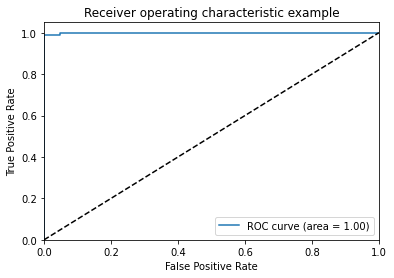

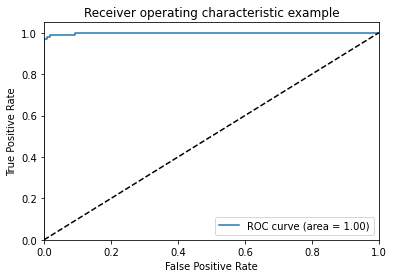

In [ ]:
from sklearn.metrics import roc_curve, auc
 
n_classes=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict_test[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
 
# Plot of a ROC curve for a specific class
for i in range(n_classes):
 plt.figure()
 plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
 plt.plot([0, 1], [0, 1], 'k--')
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver operating characteristic example')
 plt.legend(loc="lower right")
 plt.show()

import imag

In [ ]:
import cv2
im_color = cv2.imread('/content/00000299.png')
im_color =np.expand_dims(im_color, axis=0)
predictions = model.predict(im_color)
predict_class = np.argmax(predictions)
print("predict_class ",predict_class)



predict_class  1
